<a href="https://colab.research.google.com/github/VishakBharadwaj94/tf_v_fastai/blob/master/tf_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
from pathlib import Path
path = Path('.')

In [20]:
dirs = [e for e in path.iterdir() if e.is_dir()]
print(dirs)

[PosixPath('.config'), PosixPath('sample_data')]


In [6]:
train_labels,test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
#the output will be in the form (no_of_examples,height,width) for an image dataset
train_images.shape

(60000, 28, 28)

In [10]:
#the number of examples should match the length of the array train_labels
len(train_labels)

60000

In [11]:
#similarly with the test set
test_images.shape,len(test_labels)

((10000, 28, 28), 10000)

In [0]:
#normalize dataset
train_images = train_images / 255.0

test_images = test_images / 255.0

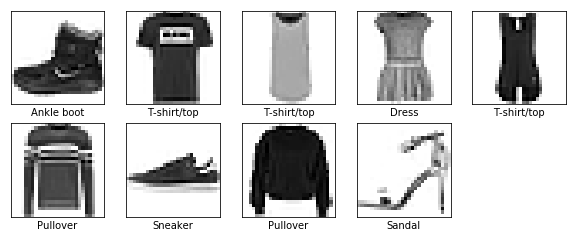

In [15]:
#have a look at the dataset

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #no learning here
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4956 - acc: 0.8220
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3674 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3330 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3089 - acc: 0.8868
Epoch 5/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2950 - acc: 0.8892


In [27]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2785 - acc: 0.8944
Epoch 2/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2673 - acc: 0.8993
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2541 - acc: 0.9051
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2446 - acc: 0.9078
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2371 - acc: 0.9094


In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print(test_loss, test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3488 - acc: 0.8849
0.3487933893561363 0.8849


In [100]:
image = '/content/shirt.jpg'
image

'/content/shirt.jpg'

In [0]:
import numpy as np
import cv2
img = cv2.imread(image,0)

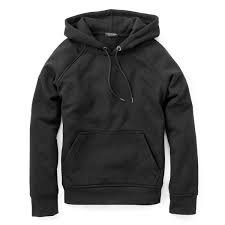

In [109]:
cv2_imshow(img)

In [110]:
print(img.shape)
img = cv2.resize(img,(28,28))
print(img.shape)        

img =np.expand_dims(img, axis=0)
img.shape

(225, 225)
(28, 28)


(1, 28, 28)

In [0]:
predictions = model.predict(img)

In [112]:
predictions

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [113]:
class_names[np.argmax(predictions)]

'Sandal'

In [0]:
image = '/content/pullover.jpg'
#run above cells again